In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

import joypy
import random
from matplotlib import pyplot as plt
from matplotlib import cm

import sklearn
from sklearn.preprocessing import quantile_transform

import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import nbinom
import seaborn as sns

In [34]:
os.chdir("/data/home/ysh980101/2312/Data")
os.getcwd()

'/data1/home/ysh980101/2312/Data'

In [31]:
count = pd.read_csv("count.csv", encoding='cp949')
count_mat = count.set_index('gene_symbol').drop(columns='ensembl_id')
count_log = np.log2(count_mat + 1)
meta = pd.read_csv("meta.csv",encoding='cp949')
meta['Subtype'] = meta['Subtype'].apply(lambda x: 'other' if x != 'EBV' else x)
meta_mat = meta.set_index('sampleID')
meta_mat = meta_mat.drop('Hypermethylation-category', axis=1)
meta_mat['Subtype'].value_counts()
subtypes = meta_mat['Subtype'].tolist()
count_T = count_mat.T

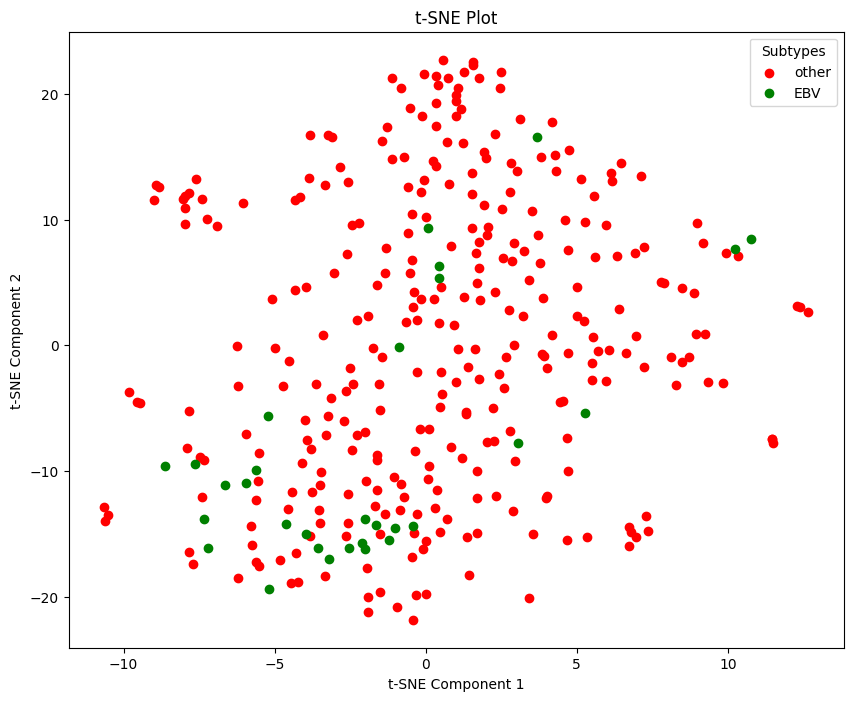

In [5]:
# tsne 1
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(count_T)
tsne_df = pd.DataFrame(data_tsne, columns=['x', 'y'])
tsne_df['Subtype'] = subtypes
plt.figure(figsize=(10, 8))
subtype_colors = {'other': 'red', 'EBV': 'green'}
subtype_labels = list(subtype_colors.keys())
for subtype in subtype_labels:
    subtype_indices = tsne_df[tsne_df['Subtype'] == subtype]
    plt.scatter(subtype_indices['x'], subtype_indices['y'], color=subtype_colors[subtype], label=subtype)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Subtypes')
plt.show()

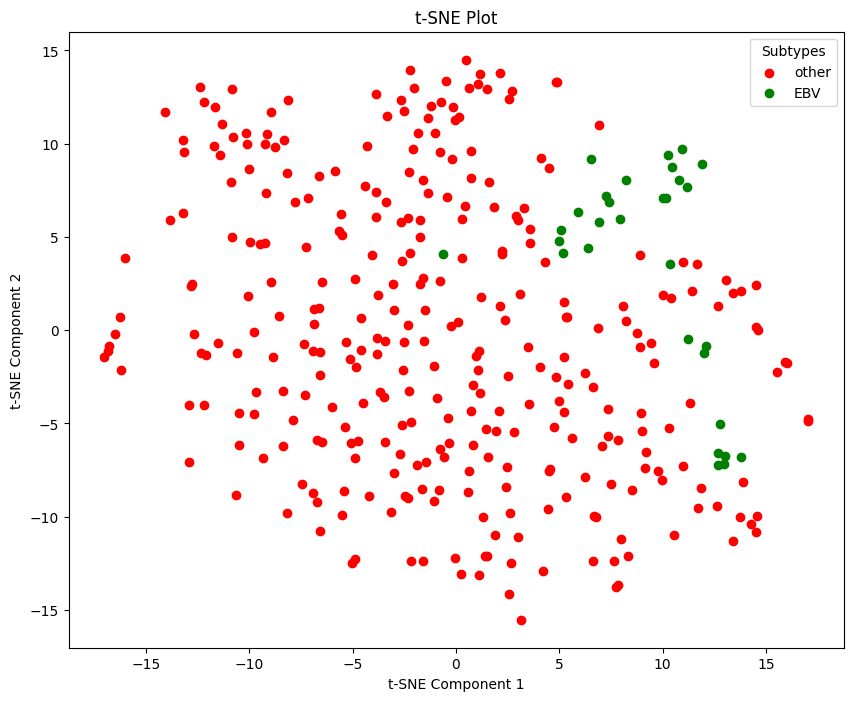

In [6]:
# tsne 2
subtypes = meta_mat['Subtype'].tolist()
count_log_T = count_log.T
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(count_log_T)
tsne_df = pd.DataFrame(data_tsne, columns=['x', 'y'])
tsne_df['Subtype'] = subtypes
plt.figure(figsize=(10, 8))
subtype_colors = {'other': 'red', 'EBV': 'green'}
subtype_labels = list(subtype_colors.keys())
for subtype in subtype_labels:
    subtype_indices = tsne_df[tsne_df['Subtype'] == subtype]
    plt.scatter(subtype_indices['x'], subtype_indices['y'], color=subtype_colors[subtype], label=subtype)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Subtypes')
plt.show()

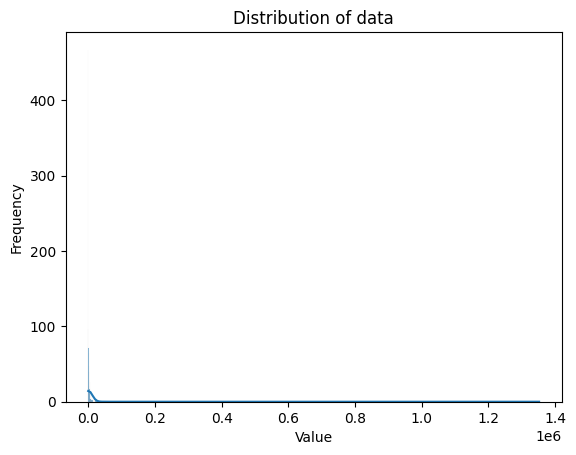

In [7]:
count_log_random = count_log.iloc[random.sample(range(len(count_log)), 1000)]
count_random = count_mat.iloc[random.sample(range(len(count_mat)), 1000)]

sns.histplot(count_random.iloc[:,0], kde=True)
plt.title("Distribution of data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

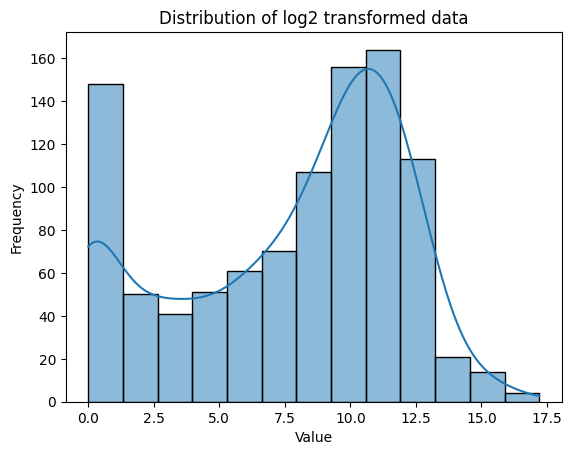

In [8]:
sns.histplot(count_log_random.iloc[:,0], kde=True)
plt.title("Distribution of log2 transformed data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
count_log_T = count_log.T
count_log_T['sampleID'] = count_log_T.index
meta2 = meta.drop("Hypermethylation-category",axis=1)
meta2_random = meta2[meta2['Subtype'] == 'other']

meta_random_indices = random.sample(list(meta2_random.index), 40)
meta2_random = pd.concat([meta2_random.loc[meta_random_indices],meta2.loc[meta2['Subtype']=='EBV']])

#### raw

In [11]:
data = pd.merge(count_log_T, meta2, on='sampleID')
other_rows = data[data['Subtype'] == 'other']

random_indices = random.sample(list(other_rows.index), 40)
data = pd.concat([data.loc[random_indices],data.loc[data['Subtype']=='EBV']])

X = data.iloc[:, :-1] 
y = data['Subtype']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#, max_depth=20)
rf_classifier.fit(X_train.iloc[:, :-2], y_train)
y_pred = rf_classifier.predict(X_test.iloc[:, :-2])
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         EBV       1.00      1.00      1.00         4
       other       1.00      1.00      1.00        10

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



#### random sampling

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random

accuracy_scores = []
classification_reports = []
confusion_matrices = []

for _ in range(1000):
    data = pd.merge(count_log_T, meta2, on='sampleID')
    other_rows = data[data['Subtype'] == 'other']
    random_indices = random.sample(list(other_rows.index), 40)
    data = pd.concat([data.loc[random_indices], data.loc[data['Subtype']=='EBV']])

    X = data.iloc[:, :-1] 
    y = data['Subtype']   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train.iloc[:, :-2], y_train)

    y_pred = rf_classifier.predict(X_test.iloc[:, :-2])
    accuracy = accuracy_score(y_test, y_pred)
    classification_reports.append(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    accuracy_scores.append(accuracy)

In [14]:
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
average_confusion_matrix = sum(confusion_matrices) / len(confusion_matrices)

print("Average Accuracy:", average_accuracy)
print("Average Confusion Matrix:")
print(average_confusion_matrix)

Average Accuracy: 0.9872142857142875
Average Confusion Matrix:
[[3.995e+00 5.000e-03]
 [1.740e-01 9.826e+00]]


In [15]:
average_classification_report = pd.DataFrame(classification_reports).mean()
print("Average Classification Report:")
print(average_classification_report)

Average Classification Report:
Series([], dtype: float64)


/tmp/ipykernel_144263/3555683031.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_classification_report = pd.DataFrame(classification_reports).mean()


In [16]:
feature_importance = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns[:-2], 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df_head = importance_df.head(100)
list_head = importance_df_head['Feature'].tolist()
print(*list_head)

ERVMER34-1 GPR158 TTLL2 HOXA10 YBX2 WDR72 CIB2 CCDC198 MLYCD NKG7 CXCL11 JPH1 CLDN3 CRAT KCNK15 ITGAE DUOX2 DDB2 FCGR1A TXNRD3 CNTNAP2 HMOX1 MTNR1A GOLT1A TNNC1 HSD17B12 TFAP2C SLC22A3 SLC35D2 CAMK2N2 C9orf24 RAD51C HYLS1 SLC6A8 CBX2 FAM222A F12 PPIC RCOR2 GZMA ZNF45 PLA2R1 MUC20 IKZF3 CCNI2 TAS2R38 TDRD5 EVX1 FNDC11 B4GALNT4 LTK CCNP TMEM220 FAH OR2I1P PDIA2 HLA-DPA1 MAPK15 AMH RASGEF1B LRATD1 SHD ARC BCL2L10 TMEM86A FCGR3A LRRC43 GZMB HLA-DRB1 IRS2 CYP27C1 ZNF185 MFSD6L PRR19 STYXL2 CHADL GPRC5B ANKMY2 NANOS3 TM4SF20 CD74 CASP1 WARS1 NYAP1 IPCEF1 HEBP1 OBSL1 DACH1 PHGDH COX17 ACAA2 DBN1 CACNG8 NEURL3 MEGF6 RELL2 WWC1 SLC27A6 ARHGEF4 ARHGDIG


In [17]:
importance_df_head

,Feature,Importance
5711,ERVMER34-1,0.016696
7159,GPR158,0.016092
18272,TTLL2,0.015903
7815,HOXA10,0.015166
19091,YBX2,0.014608
...,...,...
14264,RELL2,0.003556
19027,WWC1,0.003447
15668,SLC27A6,0.003427
1552,ARHGEF4,0.003423


In [32]:
count_log

,TCGA-3M-AB46-01,TCGA-3M-AB47-01,TCGA-B7-5816-01,TCGA-B7-5818-01,TCGA-B7-A5TI-01,TCGA-B7-A5TJ-01,TCGA-B7-A5TK-01,TCGA-B7-A5TN-01,TCGA-BR-4187-01,TCGA-BR-4191-01,...,TCGA-VQ-AA69-01,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,3.700440,3.000000,0.000000,0.000000,2.000000,1.000000,4.087463,4.643856,0.000000,5.459432,...,2.000000,2.321928,2.321928,2.321928,3.000000,2.321928,3.906891,3.700440,4.087463,3.459432
A1CF,6.129283,10.472691,2.321928,0.000000,10.622967,11.290019,7.238405,7.864186,10.587778,7.672425,...,1.000000,6.491853,12.131857,10.189825,8.118941,12.886840,5.491853,10.171177,10.764872,8.511753
A2M,13.667666,16.151334,14.773036,12.957646,15.710161,14.294262,16.600044,15.887768,16.956388,15.664892,...,13.737036,14.367346,15.063774,12.973339,15.609092,14.624510,15.392049,15.813781,16.800255,15.476873
A2ML1,3.000000,3.459432,3.700440,9.014020,8.507795,2.584963,1.000000,8.103288,6.727920,7.451211,...,2.584963,7.199672,3.169925,1.000000,3.169925,3.169925,3.584963,3.700440,3.700440,2.000000
A3GALT2,2.584963,2.000000,1.000000,0.000000,2.000000,2.584963,0.000000,2.000000,2.000000,5.672425,...,1.584963,5.044394,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.491853,3.807355,2.000000,0.000000,3.321928,3.169925,3.000000,2.321928,4.087463,7.108524,...,3.321928,2.584963,2.807355,8.189825,5.044394,2.807355,3.321928,4.906891,4.000000,4.807355
ZYG11B,11.578373,11.651500,10.969387,9.935165,11.037547,10.977280,12.053926,11.147841,12.109178,11.062721,...,12.642277,11.920353,11.654636,11.467096,11.579787,11.696098,12.177420,11.615170,11.890644,10.957828
ZYX,12.997179,13.778283,13.937466,13.525154,13.683324,14.073640,14.662446,14.565876,14.084891,13.183480,...,13.509280,14.043284,14.510146,12.717676,14.018200,13.671873,13.941139,14.198599,14.632882,13.528332


In [19]:
count_log_T_head = count_log_T[list_head]
count_log_T_head

gene_symbol,ERVMER34-1,GPR158,TTLL2,HOXA10,YBX2,WDR72,CIB2,CCDC198,MLYCD,NKG7,...,ACAA2,DBN1,CACNG8,NEURL3,MEGF6,RELL2,WWC1,SLC27A6,ARHGEF4,ARHGDIG
TCGA-3M-AB46-01,6.942515,9.308339,5.426265,10.579316,10.486835,10.251482,8.317413,1.584963,7.888743,7.118941,...,11.227014,10.566054,8.696968,8.422065,9.743151,5.523562,11.594325,2.584963,5.523562,5.700440
TCGA-3M-AB47-01,7.257388,7.467606,4.857981,10.115044,11.377211,11.224605,9.375039,4.392317,10.086136,8.438792,...,13.246741,12.302068,5.209453,3.321928,11.250298,4.459432,11.367415,5.285402,8.823367,4.087463
TCGA-B7-5816-01,8.266787,9.092757,0.000000,9.103288,7.954196,8.011227,9.226412,2.000000,9.818582,10.287712,...,12.363313,12.416270,5.584963,6.988685,12.216746,7.179909,13.892922,1.000000,7.971544,3.906891
TCGA-B7-5818-01,0.000000,1.584963,0.000000,1.000000,2.000000,7.189825,4.169925,9.014020,6.375039,10.096715,...,10.581201,9.656425,6.087463,8.724514,8.751544,4.857981,12.456611,0.000000,5.672425,0.000000
TCGA-B7-A5TI-01,8.113742,3.807355,5.000000,5.954196,9.994353,12.045418,9.139551,10.308339,9.447083,8.717676,...,10.087463,12.078484,6.129283,8.238405,10.897845,5.882643,12.428884,1.000000,7.339850,2.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VQ-AA6G-01,8.632995,4.169925,5.357552,9.672425,4.754888,11.277287,8.103288,6.303781,9.990104,7.000000,...,11.990104,11.628446,1.584963,7.531381,10.195987,8.326429,13.307058,3.459432,9.264443,3.169925
TCGA-VQ-AA6I-01,11.485829,6.169925,6.459432,11.217958,11.631177,10.806550,7.076816,6.930737,11.045760,9.350939,...,14.239375,10.939579,5.087463,7.483816,11.763212,8.654636,13.086634,3.807355,8.668885,8.625709
TCGA-VQ-AA6J-01,9.759888,4.321928,7.807355,10.938844,7.693487,11.042343,11.592457,5.584963,10.734710,9.971544,...,13.217655,12.956013,5.247928,8.672425,10.623881,9.247928,12.990636,4.169925,9.036174,4.321928
TCGA-ZA-A8F6-01,4.807355,4.523562,6.554589,9.142107,9.509775,3.321928,9.902375,7.491853,10.103288,8.738092,...,11.918118,11.424691,5.247928,5.754888,10.526499,7.011227,12.203348,4.169925,9.095397,2.584963


In [20]:
count_log_T_head_T = count_log_T_head.T
count_log_T_head_T

,TCGA-3M-AB46-01,TCGA-3M-AB47-01,TCGA-B7-5816-01,TCGA-B7-5818-01,TCGA-B7-A5TI-01,TCGA-B7-A5TJ-01,TCGA-B7-A5TK-01,TCGA-B7-A5TN-01,TCGA-BR-4187-01,TCGA-BR-4191-01,...,TCGA-VQ-AA69-01,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ERVMER34-1,6.942515,7.257388,8.266787,0.000000,8.113742,2.807355,2.000000,6.672425,3.584963,5.643856,...,2.807355,8.658211,7.169925,9.105909,6.539159,8.632995,11.485829,9.759888,4.807355,9.583083
GPR158,9.308339,7.467606,9.092757,1.584963,3.807355,4.643856,4.857981,8.754888,4.523562,8.668885,...,1.584963,9.871905,4.087463,8.550747,9.800900,4.169925,6.169925,4.321928,4.523562,7.994353
TTLL2,5.426265,4.857981,0.000000,0.000000,5.000000,8.071462,0.000000,1.584963,4.643856,5.209453,...,0.000000,6.977280,7.599913,7.228819,3.906891,5.357552,6.459432,7.807355,6.554589,5.247928
HOXA10,10.579316,10.115044,9.103288,1.000000,5.954196,10.596190,7.741467,10.463524,7.169925,3.321928,...,2.807355,11.073472,10.304922,10.171177,8.891784,9.672425,11.217958,10.938844,9.142107,10.238405
YBX2,10.486835,11.377211,7.954196,2.000000,9.994353,11.114393,5.247928,8.276124,8.870365,5.169925,...,10.871135,4.906891,12.100334,10.826548,9.920353,4.754888,11.631177,7.693487,9.509775,7.491853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RELL2,5.523562,4.459432,7.179909,4.857981,5.882643,8.543032,5.832890,7.839204,4.392317,7.011227,...,4.087463,7.000000,8.348728,6.285402,6.988685,8.326429,8.654636,9.247928,7.011227,6.442943
WWC1,11.594325,11.367415,13.892922,12.456611,12.428884,11.685625,11.882261,12.482808,9.729621,11.692180,...,13.310613,13.454813,12.403278,11.315150,14.216746,13.307058,13.086634,12.990636,12.203348,10.985130
SLC27A6,2.584963,5.285402,1.000000,0.000000,1.000000,3.321928,1.584963,4.523562,3.459432,4.459432,...,0.000000,2.807355,3.169925,5.129283,3.906891,3.459432,3.807355,4.169925,4.169925,3.169925


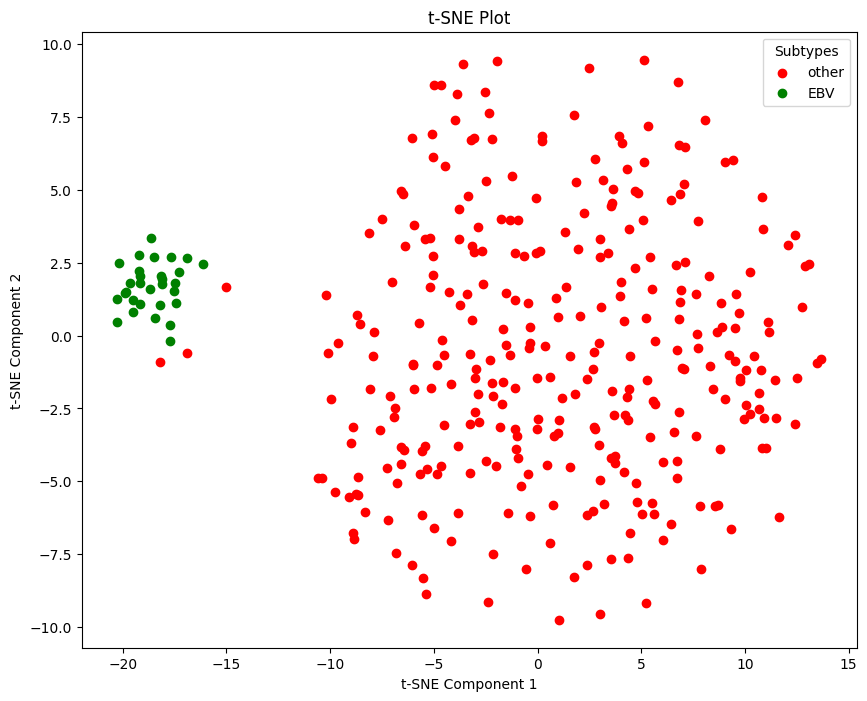

In [21]:
# tsne 3
subtypes = meta_mat['Subtype'].tolist()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(count_log_T_head)

tsne_df = pd.DataFrame(data_tsne, columns=['x', 'y'])
tsne_df['Subtype'] = subtypes

plt.figure(figsize=(10, 8))
subtype_colors = {'other': 'red', 'EBV': 'green'}
subtype_labels = list(subtype_colors.keys())
for subtype in subtype_labels:
    subtype_indices = tsne_df[tsne_df['Subtype'] == subtype]
    plt.scatter(subtype_indices['x'], subtype_indices['y'], color=subtype_colors[subtype], label=subtype)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Subtypes')
plt.show()

#### tsne by deseq2

In [22]:
count_deseq = pd.read_csv("../Res/res.ebv.other.csv", encoding='cp949', index_col=0)


In [23]:
count_deseq

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneID
CLDN3,10450.678146,7.318543,0.286606,25.535222,8.013276e-144,1.565554e-139,CLDN3
HOXA10,682.431498,4.850829,0.295525,16.414262,1.512091e-60,1.477086e-56,HOXA10
SLC6A8,5698.833362,3.382722,0.212359,15.929254,3.970653e-57,2.585822e-53,SLC6A8
TXNRD3,353.304197,2.281672,0.154552,14.763109,2.533276e-49,1.035551e-45,TXNRD3
KCNK15,513.634997,5.410548,0.366567,14.760066,2.650231e-49,1.035551e-45,KCNK15
...,...,...,...,...,...,...,...
AC233992.2,0.027214,-0.002097,4.183305,-0.000501,9.996001e-01,9.997402e-01,AC233992.2
POTEB2,0.026451,-0.002097,4.194542,-0.000500,9.996012e-01,9.997402e-01,POTEB2
CT45A6,0.027325,-0.002096,4.617837,-0.000454,9.996379e-01,9.997402e-01,CT45A6
MRPL32,2122.936543,0.000034,0.093705,0.000363,9.997105e-01,9.997617e-01,MRPL32


In [24]:
count_deseq_p05 = count_deseq[count_deseq['padj'] < 0.05]
count_deseq_p05_top100 = count_deseq_p05.head(100)
count_deseq_p05_top100

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GeneID
CLDN3,10450.678146,7.318543,0.286606,25.535222,8.013276e-144,1.565554e-139,CLDN3
HOXA10,682.431498,4.850829,0.295525,16.414262,1.512091e-60,1.477086e-56,HOXA10
SLC6A8,5698.833362,3.382722,0.212359,15.929254,3.970653e-57,2.585822e-53,SLC6A8
TXNRD3,353.304197,2.281672,0.154552,14.763109,2.533276e-49,1.035551e-45,TXNRD3
KCNK15,513.634997,5.410548,0.366567,14.760066,2.650231e-49,1.035551e-45,KCNK15
...,...,...,...,...,...,...,...
CFAP46,197.413058,4.070112,0.383975,10.599946,2.981533e-26,6.067730e-24,CFAP46
OSBP2,815.146834,2.198647,0.207794,10.580876,3.655227e-26,7.362079e-24,OSBP2
ALPI,397.984382,5.069479,0.479910,10.563392,4.404528e-26,8.734445e-24,ALPI
BAIAP3,277.777405,2.424623,0.229541,10.562935,4.426013e-26,8.734445e-24,BAIAP3


In [25]:
list_deseq = count_deseq_p05_top100.index.tolist()
print(*list_deseq)

CLDN3 HOXA10 SLC6A8 TXNRD3 KCNK15 ERVMER34-1 HYLS1 MFSD6L C5orf63 RCOR2 KCNH8 CDX1 GUCY2C ALG1L KLHL35 ZIC5 PRAME ESYT3 BCL2L10 TPD52L1 GGACT ECHDC2 SLC22A3 TM4SF20 PRSS21 BMP8B RIMKLA F12 SLC6A20 HOXA9 FAM131C TTLL2 DUOX2 FBXO2 DPP4 ENTPD8 SMIM32 FABP1 LRRC75B HOXC12 RIBC2 MLYCD C9orf24 SCNN1A GOLT1A C2CD4B HOXA11 CACNG4 DUOXA2 WDR72 NKD2 PAX6 NMNAT3 AC005551.1 LEFTY1 CT83 NOL3 DUSP9 PRXL2A STYXL2 PCLO PRSS51 NINL CDH17 FAM3B TMEM151A SLC34A2 GPR158 TDRD5 TMEM52 ZNF480 MEP1A C1orf115 IGF2BP1 KRT7 TM6SF2 PROC LTK WNT11 LRRN1 UBXN10 ACHE ATP6V1C2 CKMT1B RHCG PF4 WNK2 TLX1 SLC35D3 SLC7A4 EVX1 DLX6 MUC12 TFAP2C KCNK6 CFAP46 OSBP2 ALPI BAIAP3 TNNC2


In [26]:
count_log_T_deseq = count_log_T[list_deseq]
count_log_T_deseq

gene_symbol,CLDN3,HOXA10,SLC6A8,TXNRD3,KCNK15,ERVMER34-1,HYLS1,MFSD6L,C5orf63,RCOR2,...,EVX1,DLX6,MUC12,TFAP2C,KCNK6,CFAP46,OSBP2,ALPI,BAIAP3,TNNC2
TCGA-3M-AB46-01,14.218336,10.579316,10.256209,7.629357,8.422065,6.942515,9.243174,7.199672,9.233620,9.082149,...,3.459432,7.321928,6.599913,9.645658,13.282799,6.459432,7.832890,7.761551,6.087463,9.103288
TCGA-3M-AB47-01,13.252222,10.115044,12.451984,8.149747,6.857981,7.257388,9.005625,7.087463,9.558421,7.643856,...,6.266787,4.754888,6.044394,2.321928,11.687376,4.700440,7.321928,7.459432,6.820179,7.707359
TCGA-B7-5816-01,9.848623,9.103288,12.100334,8.618386,8.388017,8.266787,7.592457,9.221587,5.087463,9.082149,...,0.000000,2.584963,4.643856,8.179909,11.715533,4.000000,9.539159,0.000000,6.022368,1.584963
TCGA-B7-5818-01,3.321928,1.000000,7.357552,4.321928,1.584963,0.000000,5.781360,1.000000,3.459432,4.247928,...,0.000000,0.000000,1.584963,4.087463,8.294621,0.000000,5.523562,0.000000,5.000000,2.000000
TCGA-B7-A5TI-01,11.679480,5.954196,12.264149,8.174926,4.247928,8.113742,8.209453,9.525521,9.000000,7.870365,...,4.954196,7.807355,11.816984,6.942515,10.975131,5.321928,10.149747,4.169925,8.764872,2.584963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-VQ-AA6G-01,13.035486,9.672425,13.839007,5.523562,5.954196,8.632995,6.727920,4.643856,9.319672,8.285402,...,7.238405,1.000000,16.550942,5.285402,13.249558,4.459432,8.479780,11.367415,8.238405,7.247928
TCGA-VQ-AA6I-01,14.287280,11.217958,12.281351,9.245553,10.023754,11.485829,9.405141,8.596190,8.060696,8.357552,...,5.044394,9.296916,6.741467,10.198445,11.408330,6.087463,10.118941,7.483816,8.383704,5.672425
TCGA-VQ-AA6J-01,14.048998,10.938844,12.596656,9.353147,7.592457,9.759888,9.027906,6.569856,9.688250,10.743151,...,10.658211,9.394463,7.303781,9.712527,12.187352,4.754888,11.196602,7.199672,7.607330,10.846274
TCGA-ZA-A8F6-01,12.154185,9.142107,13.094573,8.550747,10.499846,4.807355,7.629357,4.247928,8.774787,7.569856,...,3.807355,1.584963,12.677059,3.321928,11.751544,4.857981,9.784635,8.939579,6.554589,8.375039


In [27]:
count_log_T_deseq_T = count_log_T_deseq.T
count_log_T_deseq_T

,TCGA-3M-AB46-01,TCGA-3M-AB47-01,TCGA-B7-5816-01,TCGA-B7-5818-01,TCGA-B7-A5TI-01,TCGA-B7-A5TJ-01,TCGA-B7-A5TK-01,TCGA-B7-A5TN-01,TCGA-BR-4187-01,TCGA-BR-4191-01,...,TCGA-VQ-AA69-01,TCGA-VQ-AA6A-01,TCGA-VQ-AA6B-01,TCGA-VQ-AA6D-01,TCGA-VQ-AA6F-01,TCGA-VQ-AA6G-01,TCGA-VQ-AA6I-01,TCGA-VQ-AA6J-01,TCGA-ZA-A8F6-01,TCGA-ZQ-A9CR-01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
CLDN3,14.218336,13.252222,9.848623,3.321928,11.679480,14.255840,4.523562,13.063227,12.621823,10.103288,...,5.392317,13.973159,14.713011,13.350249,13.132821,13.035486,14.287280,14.048998,12.154185,13.236762
HOXA10,10.579316,10.115044,9.103288,1.000000,5.954196,10.596190,7.741467,10.463524,7.169925,3.321928,...,2.807355,11.073472,10.304922,10.171177,8.891784,9.672425,11.217958,10.938844,9.142107,10.238405
SLC6A8,10.256209,12.451984,12.100334,7.357552,12.264149,11.495355,10.029287,13.811977,12.065416,9.867279,...,7.087463,9.961450,13.134426,12.290883,10.355351,13.839007,12.281351,12.596656,13.094573,11.531869
TXNRD3,7.629357,8.149747,8.618386,4.321928,8.174926,8.543032,7.149747,8.689998,8.321928,7.864186,...,3.700440,8.618386,8.640245,9.041659,9.616549,5.523562,9.245553,9.353147,8.550747,7.693487
KCNK15,8.422065,6.857981,8.388017,1.584963,4.247928,10.315150,0.000000,8.491853,7.209453,6.988685,...,0.000000,12.008429,6.209453,7.768184,7.303781,5.954196,10.023754,7.592457,10.499846,11.199672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CFAP46,6.459432,4.700440,4.000000,0.000000,5.321928,8.951285,3.169925,5.857981,4.459432,5.977280,...,2.321928,7.930737,2.807355,2.000000,5.584963,4.459432,6.087463,4.754888,4.857981,4.459432
OSBP2,7.832890,7.321928,9.539159,5.523562,10.149747,9.954196,8.076816,9.684749,9.505812,9.252665,...,6.491853,9.647458,9.192293,10.946906,10.346514,8.479780,10.118941,11.196602,9.784635,7.900867
ALPI,7.761551,7.459432,0.000000,0.000000,4.169925,7.721099,1.584963,4.954196,10.066089,7.442943,...,2.000000,9.292322,7.426265,6.894818,4.169925,11.367415,7.483816,7.199672,8.939579,2.321928


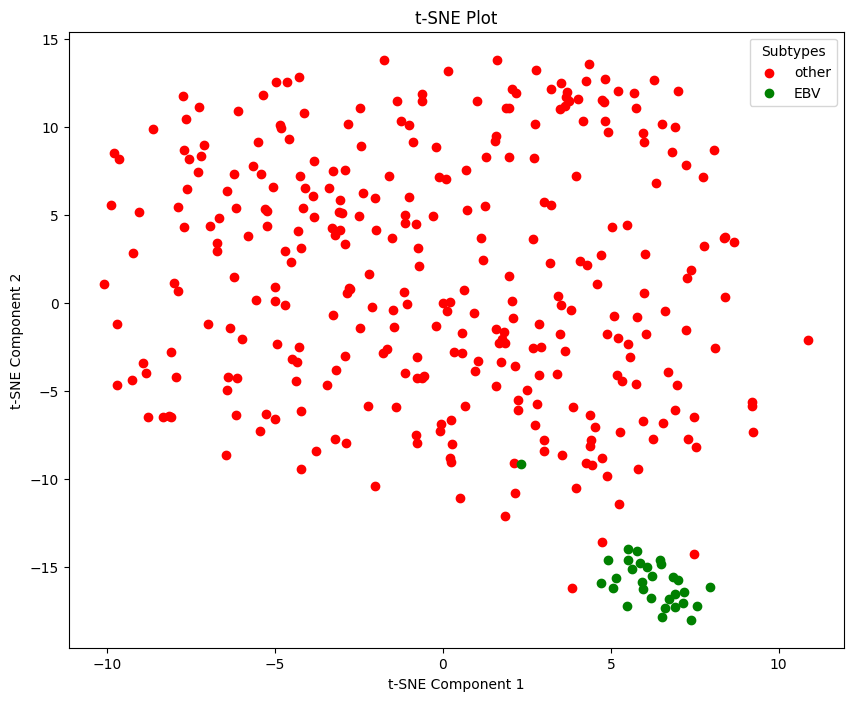

In [28]:
# tsne 3
subtypes = meta_mat['Subtype'].tolist()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(count_log_T_deseq)

tsne_df = pd.DataFrame(data_tsne, columns=['x', 'y'])
tsne_df['Subtype'] = subtypes

plt.figure(figsize=(10, 8))
subtype_colors = {'other': 'red', 'EBV': 'green'}
subtype_labels = list(subtype_colors.keys())
for subtype in subtype_labels:
    subtype_indices = tsne_df[tsne_df['Subtype'] == subtype]
    plt.scatter(subtype_indices['x'], subtype_indices['y'], color=subtype_colors[subtype], label=subtype)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Subtypes')
plt.show()